In [7]:
#!/usr/bin/env python
# coding: utf-8
import os
import pandas as pd
import xlwings as xw
#import pyodbc
import seaborn as sbrn
import sys
# sys.path.append(r'C:\Funciones')
import subprocess
# Aquí pondremos la funciones SQL MS PostgreSQL y demás conexiones 
#from SQL_conexions import sql_conexion
from datetime import datetime#
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [5]:
# Leer base 
DF_0 = pd.read_excel('base_PIB_Python.xlsx')
DF_0.head()



,Periodos,PIB (2018=100),Consumo Privado (2018=100),Consumo de Gobierno (2018=100),Formación Bruta de Capital Fijo (2018=100),Exportaciones (2018=100),Importaciones (2018=100),Variación de Existencias (2018=100),Discrepancia estadística (2018=100)
0,1993-01-01 00:00:00,13759047,9639086,1139073,2726444,1612358,1944696,497390,89392
1,1993-02-01 00:00:00,13889138,9854072,1142570,2516515,1617715,2019197,458585,318878
2,1993-03-01 00:00:00,13862878,9830614,1195961,2719836,1529828,2001274,252760,335152
3,1993-04-01 00:00:00,14077368,10177877,1287378,3176915,1686152,2129348,227115,-348721
4,1994-01-01 00:00:00,14100080,9779526,1278129,3070359,1716620,2145610,444988,-43932


Pendiente (b): 1.4383311495587352
Intersección (a): 67810.7616497241


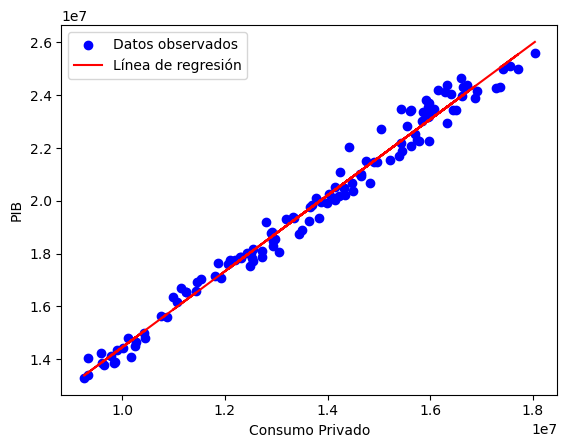

In [8]:
# Definir las variables independientes (X) y dependientes (Y)
X = DF_0[['Consumo Privado (2018=100)']]  # Nota: X debe ser 2D, por eso usamos doble corchete
Y = DF_0['PIB (2018=100)']

# Crear el modelo de regresión lineal
modelo = LinearRegression()

# Ajustar el modelo con los datos
modelo.fit(X, Y)

# Obtener la pendiente (coeficiente) y la intersección
pendiente = modelo.coef_[0]
interseccion = modelo.intercept_

print(f'Pendiente (b): {pendiente}')
print(f'Intersección (a): {interseccion}')

# Hacer predicciones (opcional)
predicciones = modelo.predict(X)

# Visualización (opcional)
plt.scatter(X, Y, color='blue', label='Datos observados')
plt.plot(X, predicciones, color='red', label='Línea de regresión')
plt.xlabel('Consumo Privado')
plt.ylabel('PIB')
plt.legend()
plt.show()

array([13932008.40872524, 14241229.46924427, 14207489.09713792,
       14706968.28712714, 14134007.63536926, 14843612.62299751,
       14810243.34032775, 15099637.00595012, 13478312.73755762,
       13375735.27496454, 13490213.48948907, 13868366.57035071,
       13845522.99503342, 14299043.18980078, 14459038.83188425,
       15067733.38272176, 14614216.06461669, 15709975.56929157,
       15547907.29202159, 15998299.11653867, 15876347.33336103,
       16244344.35797563, 16244843.45888453, 16517670.42632628,
       16090677.37295023, 16549499.25633487, 16659629.39579428,
       17053714.87079958, 17140843.21851525, 17749145.10494893,
       17939217.68970082, 18129001.16989164, 17482735.97109651,
       17780995.50992475, 17616480.63136938, 18031571.49448283,
       17231420.68432756, 18045892.95773899, 17789047.28769999,
       18098699.84756389, 17414852.49416193, 18364119.40958541,
       18380850.07751708, 18856009.96442955, 18102722.8597892 ,
       18626790.32078012, 18680782.39547